In [39]:
import mediapipe as mp
import os
import time
import cv2

In [29]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 --user

  Using cached tensorflow-2.8.1-cp310-cp310-win_amd64.whl (438.3 MB)
  Using cached tensorflow_gpu-2.8.1-cp310-cp310-win_amd64.whl (438.3 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [40]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [41]:
interpreter = tf.lite.Interpreter(model_path = '3.tflite')
interpreter.allocate_tensors()

In [60]:
test_image_folder = 'Test_Data/test_image_256_resize/'
TEST_IMAGES = os.listdir(test_image_folder)

In [56]:
def draw_keypoints (frame, keypoints, confidence, circle_size):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y, x, 1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence:
            cv2.circle(frame, (int(kx), int(ky)), circle_size, (0, 255, 0), -1)

In [58]:
def pose_extraction(img_file_name, circle_size):
    image_url = os.path.join(test_image_folder, img_file_name)
    image = cv2.imread(image_url)
    img = tf.image.resize_with_pad(np.expand_dims(image, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    start_time = time.time() * 1000
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    end_time = time.time() * 1000
    process_time = end_time - start_time
    print(process_time)
    print(keypoints_with_scores)
    draw_keypoints(image, keypoints_with_scores, 0.3, circle_size)
    plt.imshow(image)

5.998291015625
[[[[0.23323458 0.5327812  0.55729824]
   [0.22344552 0.5444462  0.6313518 ]
   [0.2219401  0.51857615 0.649305  ]
   [0.22908072 0.5626809  0.33068198]
   [0.22999816 0.49710318 0.3079962 ]
   [0.2993675  0.58596706 0.6218078 ]
   [0.3152929  0.4792289  0.5899142 ]
   [0.37675115 0.6284595  0.4544538 ]
   [0.41955036 0.43949562 0.58241624]
   [0.41057754 0.5970671  0.43819544]
   [0.52166635 0.42514598 0.34758934]
   [0.4773162  0.564829   0.5411998 ]
   [0.48066753 0.50904644 0.6383175 ]
   [0.6416454  0.5542711  0.537048  ]
   [0.6417419  0.5234605  0.34103894]
   [0.76901793 0.47814637 0.3052885 ]
   [0.7839102  0.4867985  0.37684214]]]]


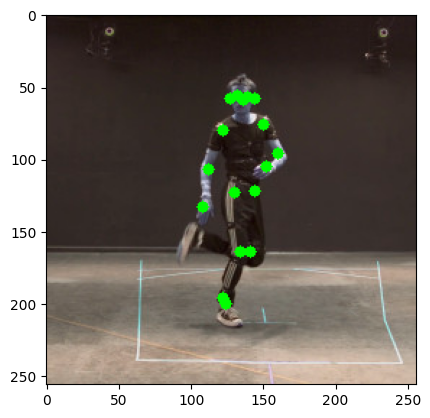

In [61]:
for img_file_name in TEST_IMAGES:
    pose_extraction(img_file_name, 4)
    break

In [62]:
test_image_folder = "Test_Data"

6.000244140625
[[[[0.12582743 0.47148454 0.5467651 ]
   [0.0964109  0.49672648 0.43170166]
   [0.09965678 0.44098353 0.66257715]
   [0.11348344 0.53761566 0.68172085]
   [0.12013742 0.40458906 0.7745242 ]
   [0.27905965 0.605264   0.8235904 ]
   [0.28638747 0.35754773 0.7670926 ]
   [0.45504948 0.6341054  0.66848344]
   [0.47404346 0.33748758 0.6877854 ]
   [0.60231286 0.6412548  0.6179751 ]
   [0.6264354  0.33889195 0.6845379 ]
   [0.59902847 0.55254954 0.6045538 ]
   [0.6065866  0.4270581  0.806932  ]
   [0.8027636  0.54165757 0.60628057]
   [0.8053473  0.45282608 0.7317165 ]
   [0.93655145 0.52678245 0.505244  ]
   [0.9325503  0.4682393  0.44964805]]]]


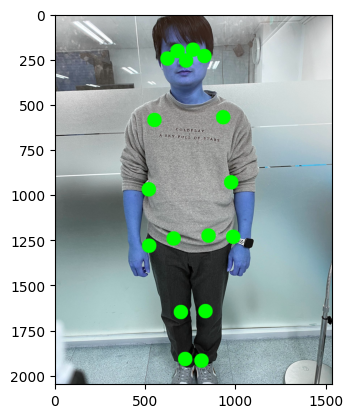

In [63]:
image_file_name = "1m.jpg"
pose_extraction(image_file_name, 40)